In [0]:
# para una decision de si o no usamos regresion logistica
# Es una clasificacion
import torch
import numpy as np
import torch.nn as nn # Modulo de redes neuronales, necesitamos relacion linel de este modulo
import torch.optim as optim # Modulo de optimizacion que trae optimizacion necesario para traer gradientes y aplicar backpropagation

import matplotlib.pyplot as plt

In [2]:
n = 100
h = n//2 # // porque trabajamos con enteros para que me de entero de resultado
dimen = 2

data = np.random.randn(n, dimen)*3
data

array([[ 4.69451876e-01,  3.18143743e-01],
       [ 8.87995940e-01, -7.36958212e-04],
       [-6.20055936e-01, -2.04327746e+00],
       [-1.17775825e+00,  3.54658493e+00],
       [-2.28164347e+00,  3.18801292e+00],
       [ 2.01595929e+00, -3.84390136e+00],
       [-2.31620290e+00, -5.93506724e-01],
       [ 8.86261236e-01, -1.53264388e+00],
       [ 9.15068779e-01,  5.14682110e+00],
       [-1.60862681e-01, -4.18581915e-01],
       [ 2.02072417e-01, -1.09453025e+00],
       [-3.06521352e+00, -2.43734647e+00],
       [-1.38099603e+00, -3.81766793e+00],
       [ 1.58195369e+00, -3.13322316e+00],
       [-9.87956391e-01,  7.67393743e-01],
       [-1.62218679e+00, -4.56658428e+00],
       [ 2.14302451e+00,  2.71831745e+00],
       [-6.59707231e+00,  6.74487693e-01],
       [-2.42668888e+00,  1.19428382e+00],
       [-2.42678687e+00,  4.77216456e+00],
       [-5.17538032e+00,  6.69734727e-01],
       [ 1.87610858e+00,  3.96043682e+00],
       [ 1.65183700e+00, -6.61255051e+00],
       [ 7.

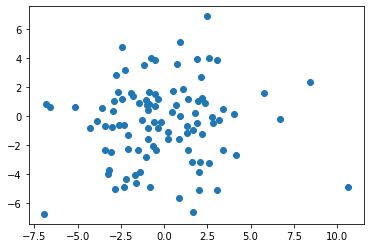

In [3]:
plt.scatter(data[:,0], data[:,1])

In [0]:
data[:h, :] = data[:h, :] - 3*np.ones((h, dimen))
data[h:, :] = data[h:, :] + 3*np.ones((h, dimen))

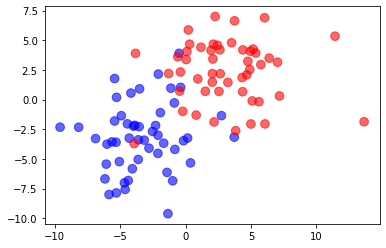

In [15]:
colors = ['blue', 'red']

color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color, alpha = 0.6, s = 75)

In [16]:
target = np.array([0]*h + [1]*h).reshape(n, 1)
# Forzar a que sean float
x = torch.from_numpy(data).float().requires_grad_(True)

y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.1977, grad_fn=<BinaryCrossEntropyBackward>)

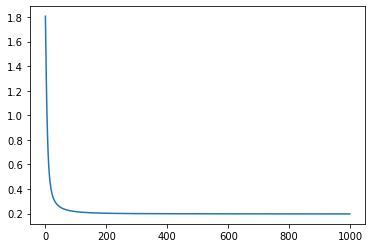

In [20]:
# Combino varios modelos con sequential
model = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())
loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=0.015)

losses = []

iterations = 1000

for i in range(iterations):
  result = model(x)

  loss = loss_function(result, y)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

plt.plot(range(iterations), losses)
loss


In [23]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue)
prediction

tensor([[0.0015]], grad_fn=<SigmoidBackward>)

In [25]:
# Probamos que funcione el modelo
# asignamos un punto azul coordenada -5, -6
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

red = torch.Tensor([[5, 2.5]])
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])

blue
red


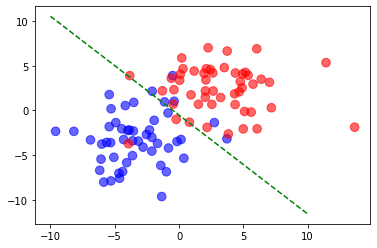

In [26]:
# graficamos la separacion con pesos del modelo
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

x_axis = np.linspace(-10, 10, n)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis,'g--')